IMPORTING LIBERARIES

In [5]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models


In [1]:
!unzip /content/garbage.zip

Archive:  /content/garbage.zip
   creating: garbage/TrashType_Image_Dataset/cardboard/
   creating: garbage/TrashType_Image_Dataset/glass/
   creating: garbage/TrashType_Image_Dataset/metal/
   creating: garbage/TrashType_Image_Dataset/paper/
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_001.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_002.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_003.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_004.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_005.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_006.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_007.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_008.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_009.jpg  
 extracting: garbage/TrashType_Image_Dataset/plastic/plastic_010.jpg  
 extracting: garbage/TrashType_Image_Dataset/pl

In [2]:
!ls /content/


garbage  garbage.zip  sample_data


USING DATASET

In [4]:

dataset_dir = '/content/garbage'
image_size = (124, 124)
batch_size = 32
seed = 42

Contents of the dataset directory:
TrashType_Image_Dataset
Found 18 files belonging to 1 classes.

Class names: ['TrashType_Image_Dataset']


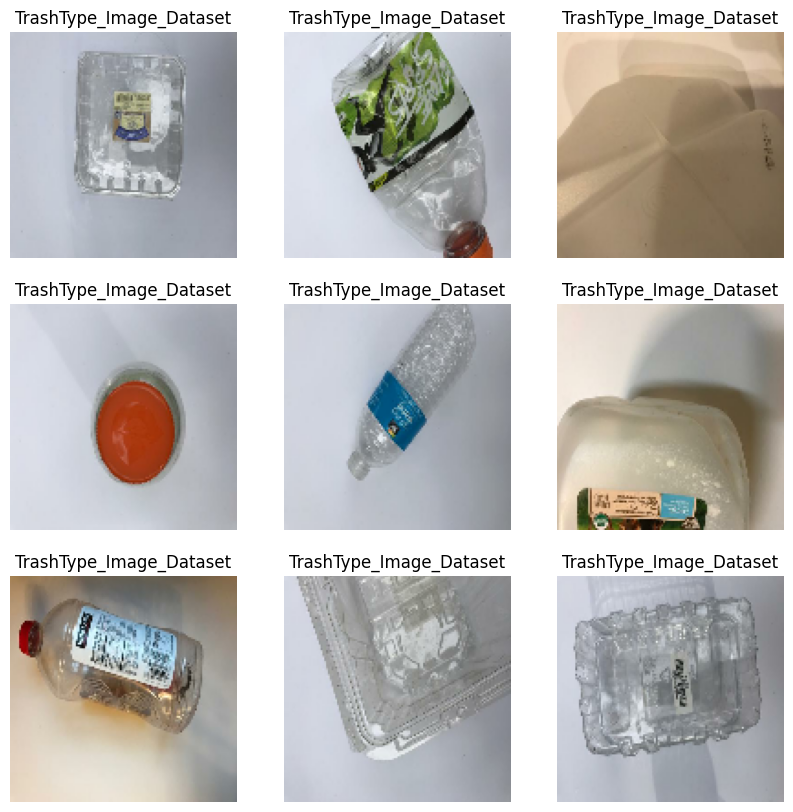

In [6]:
# List the contents of the dataset directory
import os
print("Contents of the dataset directory:")
for item in os.listdir(dataset_dir):
    print(item)

# Load a sample batch of data
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)

# Get the class names
class_names = train_ds.class_names
print("\nClass names:", class_names)

# Visualize sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Find the index of the maximum value in the one-hot encoded label
        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")
plt.show()